# Tugas 5 : meringkas satu berita

## 1. Import Library

In [1]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

- requests: Digunakan untuk mengirim permintaan HTTP untuk mengambil konten dari URL.
- BeautifulSoup: Digunakan untuk mem-parsing HTML dan mengekstrak informasi dari dokumen HTML.
- nltk.tokenize: Digunakan untuk memecah teks menjadi kalimat.
- TfidfVectorizer: Mengubah teks menjadi representasi numerik menggunakan metode TF-IDF (Term Frequency-Inverse Document Frequency).
- cosine_similarity: Menghitung kesamaan antara dua vektor menggunakan rumus kesamaan kosinus.
- networkx: Digunakan untuk membuat dan memanipulasi graf.
- matplotlib.pyplot: Digunakan untuk membuat visualisasi graf.
pandas: Digunakan untuk manipulasi dan analisis data dalam bentuk tabel.
- numpy: Digunakan untuk operasi numerik dan manipulasi array.

## 2. Mengambil Konten Berita

In [15]:
import requests
from bs4 import BeautifulSoup
import json

# URL dari mana artikel berita diambil
url = 'https://www.tempo.co/ekonomi/prabowo-tunjuk-bahlil-jadi-ketua-satgas-hilirisasi-apa-saja-tugasnya--1176810'

# Mengirim permintaan HTTP ke halaman
response = requests.get(url)

# Membuat objek BeautifulSoup untuk mem-parsing HTML
soup = BeautifulSoup(response.content, 'html.parser')

# 1. Cari <script type="application/ld+json">
script_tag = soup.find('script', type='application/ld+json')

article_text = ""

# 2. Jika ditemukan, proses JSON untuk mengambil articleBody
if script_tag:
    try:
        json_data = json.loads(script_tag.string)
        article_text = json_data.get('articleBody', '').replace('\n', ' ')
    except (json.JSONDecodeError, AttributeError):
        print("Gagal memproses JSON-LD.")

# 3. Jika articleBody tidak ditemukan, fallback ke elemen <p> dalam kontainer
if not article_text.strip():
    detail_konten_div = soup.find('div', class_='max-lg:container xl')
    if detail_konten_div:
        paragraphs = detail_konten_div.find_all('p')
        article_text = ' '.join([p.get_text() for p in paragraphs])
    else:
        print("Div dengan class 'max-lg:container xl' tidak ditemukan.")

# Cetak hasil
if article_text:
    print("Artikel berhasil diambil:")
    print(article_text)
else:
    print("Gagal mengambil artikel.")


Artikel berhasil diambil:
TEMPO.CO, Jakarta - Presiden Prabowo Subianto menunjuk Menteri Energi dan Sumber Daya Mineral (ESDM) Bahlil Lahadalia sebagai Ketua Satuan Tugas (Satgas) Hilirisasi. Satgas ini di antaranya bertugas mengintegrasikan perizinan, sehingga akan mempercepat peningkatan nilai tambah sektor yang ditetapkan. "Bapak Presiden kan sangat fokus betul untuk terkait hilirisasi, maka dipandang perlu untuk dibuatkan satgas, dan sekarang prosesnya lagi berjalan, satgas ini melibatkan kementerian-kementerian teknis," ujar Bahlil ditemui usai acara Indonesia Mining Summit 2024 di Jakarta, Rabu, 4 Desember 2024, seperti dikutip dari Antara. Dalam Satgas Hilirisasi, Bahlil akan mengkoordinasikan percepatan di Kementerian Investasi dan Hilirisasi/Badan Koordinasi Penanaman Modal (BKPM), Kementerian Kehutanan, Kementerian Kelautan dan Perikanan (KKP), Kementerian Pertanian, serta Kementerian Perindustrian. "Semua akan gabung di situ dalam rangka melakukan kerjanya biar cepat. Karena

## 3. Preprocessing - Tokenisasi Teks

In [16]:
import nltk
nltk.download('punkt_tab')
# Langkah 2: Preprocessing - Tokenisasi teks menjadi kalimat
sentences = sent_tokenize(article_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



- sent_tokenize(article_text): Memecah teks artikel menjadi kalimat menggunakan fungsi sent_tokenize dari NLTK.

## 4. Vektorisasi TF-IDF

In [17]:
# Langkah 3: Vektorisasi TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)

- TfidfVectorizer(): Membuat objek TfidfVectorizer.
- fit_transform(sentences): Mengubah kalimat menjadi matriks TF-IDF.

## 5. Menghitung Kesamaan Kosinus

In [18]:
# Langkah 4: Menghitung kesamaan kosinus antara kalimat
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)


- cosine_similarity(tfidf_matrix, tfidf_matrix): Menghitung kesamaan kosinus antara semua pasangan kalimat.

## 6. Mengubah Matriks Kesamaan ke Biner

In [19]:
# Mengubah matriks kesamaan menjadi 0 dan 1 berdasarkan ambang batas 0,5
binary_cosine_sim_matrix = np.where(cosine_sim_matrix >= 0.05, 1, 0)


## 7. Menampilkan Matriks Kesamaan

In [20]:
# Menampilkan matriks kesamaan kosinus dalam bentuk tabel
cosine_sim_df = pd.DataFrame(cosine_sim_matrix,
                              index=[f'Kalimat {i+1}' for i in range(len(sentences))],
                              columns=[f'Kalimat {i+1}' for i in range(len(sentences))])

# Menampilkan matriks kesamaan biner dalam bentuk tabel
binary_cosine_sim_df = pd.DataFrame(binary_cosine_sim_matrix,
                                     index=[f'Kalimat {i+1}' for i in range(len(sentences))],
                                     columns=[f'Kalimat {i+1}' for i in range(len(sentences))])


- pd.DataFrame(...): Membuat DataFrame Pandas dari matriks kesamaan kosinus dan kesamaan biner, dengan label untuk baris dan kolom berdasarkan nomor kalimat.

## 8. Menampilkan Tabel di Jupyter Notebook

In [21]:
# Jika Anda ingin melihat tabel di Jupyter Notebook, gunakan display()
try:
    from IPython.display import display
    display(cosine_sim_df.style.background_gradient(cmap='viridis').format("{:.2f}"))  # Format dua desimal
    display(binary_cosine_sim_df.style.background_gradient(cmap='viridis'))  # Format dua desimal
except ImportError:
    print("Matriks Kesamaan Kosinus:")
    print(cosine_sim_df.round(2))  # Format dua desimal
    print("\nMatriks Kesamaan (Biner):")
    print(binary_cosine_sim_df)

,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16
Kalimat 1,1.00,0.02,0.10,0.08,0.00,0.06,0.07,0.12,0.11,0.01,0.00,0.00,0.00,0.21,0.00,0.02
Kalimat 2,0.02,1.00,0.07,0.05,0.07,0.03,0.04,0.07,0.19,0.07,0.04,0.00,0.00,0.00,0.17,0.03
Kalimat 3,0.10,0.07,1.00,0.26,0.01,0.04,0.13,0.22,0.12,0.06,0.02,0.00,0.00,0.05,0.07,0.01
Kalimat 4,0.08,0.05,0.26,1.00,0.06,0.07,0.05,0.07,0.07,0.03,0.02,0.00,0.00,0.09,0.03,0.03
Kalimat 5,0.00,0.07,0.01,0.06,1.00,0.09,0.00,0.03,0.02,0.01,0.04,0.00,0.00,0.05,0.07,0.04
Kalimat 6,0.06,0.03,0.04,0.07,0.09,1.00,0.00,0.03,0.12,0.20,0.00,0.00,0.00,0.07,0.00,0.03
Kalimat 7,0.07,0.04,0.13,0.05,0.00,0.00,1.00,0.17,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.04
Kalimat 8,0.12,0.07,0.22,0.07,0.03,0.03,0.17,1.00,0.13,0.00,0.00,0.00,0.00,0.12,0.00,0.02
Kalimat 9,0.11,0.19,0.12,0.07,0.02,0.12,0.08,0.13,1.00,0.12,0.03,0.00,0.00,0.09,0.08,0.02
Kalimat 10,0.01,0.07,0.06,0.03,0.01,0.20,0.00,0.00,0.12,1.00,0.07,0.04,0.00,0.02,0.08,0.00


,Kalimat 1,Kalimat 2,Kalimat 3,Kalimat 4,Kalimat 5,Kalimat 6,Kalimat 7,Kalimat 8,Kalimat 9,Kalimat 10,Kalimat 11,Kalimat 12,Kalimat 13,Kalimat 14,Kalimat 15,Kalimat 16
Kalimat 1,1,0,1,1,0,1,1,1,1,0,0,0,0,1,0,0
Kalimat 2,0,1,1,0,1,0,0,1,1,1,0,0,0,0,1,0
Kalimat 3,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,0
Kalimat 4,1,0,1,1,1,1,0,1,1,0,0,0,0,1,0,0
Kalimat 5,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,0
Kalimat 6,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0
Kalimat 7,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0
Kalimat 8,1,1,1,1,0,0,1,1,1,0,0,0,0,1,0,0
Kalimat 9,1,1,1,1,0,1,1,1,1,1,0,0,0,1,1,0
Kalimat 10,0,1,1,0,0,1,0,0,1,1,1,0,0,0,1,0


- display(): Digunakan untuk menampilkan DataFrame dalam Jupyter Notebook dengan format yang lebih baik (gradien warna).
- print(): Jika tidak dalam lingkungan Jupyter, akan mencetak matriks kesamaan kosinus dan biner ke konsol.

## 9. Membangun Graf Kesamaan Kalimat

In [22]:
# Langkah 5: Membangun graf di mana node adalah kalimat, dan tepi adalah kesamaan kosinus
graph = nx.Graph()

# Menambahkan node (kalimat) ke dalam graf
for i, sentence in enumerate(sentences):
    graph.add_node(i, label=sentence)  # Menyimpan kalimat sebagai label

# Menambahkan tepi dengan bobot berdasarkan kesamaan biner
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        if binary_cosine_sim_matrix[i, j] == 1:  # Hanya menambahkan tepi untuk kesamaan yang 1
            graph.add_edge(i, j)  # Bobot tidak perlu lagi, karena kita menggunakan biner


- nx.Graph(): Membuat objek graf kosong menggunakan NetworkX.
- graph.add_node(...): Menambahkan node ke dalam graf untuk setiap kalimat.
- graph.add_edge(...): Menambahkan tepi di antara kalimat yang memiliki kesamaan biner (1).

## 10. Memeriksa Tepi dan Visualisasi Graf

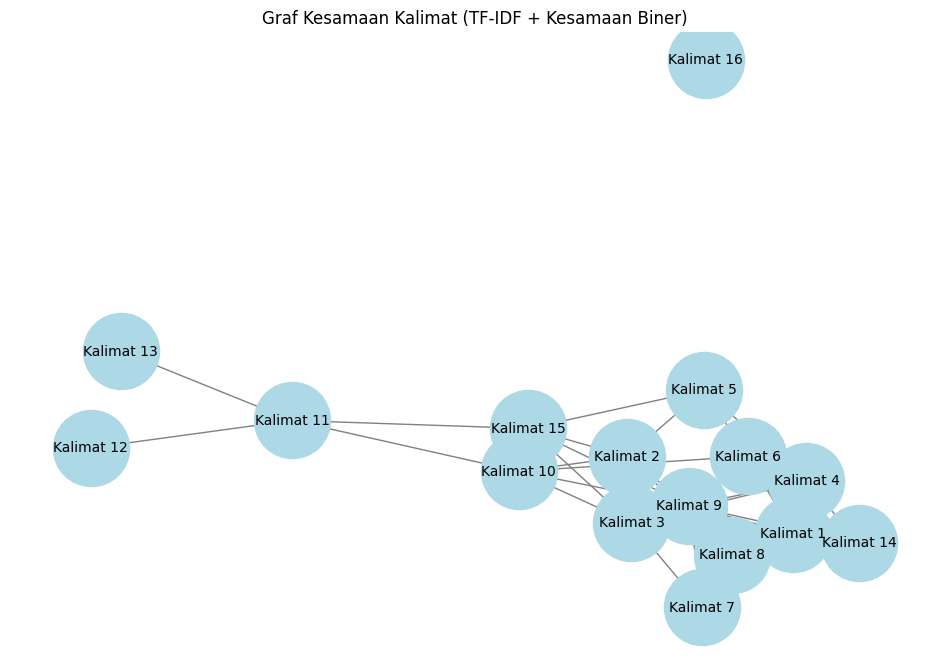

In [23]:
# Memeriksa apakah ada tepi
if len(graph.edges()) == 0:
    print("Tidak ada tepi yang dibuat. Periksa ambang batas kesamaan atau data input.")
else:
# Langkah 6: Visualisasikan graf menggunakan NetworkX
      plt.figure(figsize=(12, 8))
      pos = nx.spring_layout(graph, k=0.5)  # Layout untuk visualisasi yang lebih baik

      # Menggambar node
      nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=3000)

      # Menggambar tepi
      nx.draw_networkx_edges(graph, pos, edge_color='gray')

      # Menggambar label hanya dengan nomor kalimat
      labels = {i: f'Kalimat {i+1}' for i in graph.nodes()}  # Hanya menampilkan nomor kalimat
      nx.draw_networkx_labels(graph, pos, labels, font_size=10)

      plt.title("Graf Kesamaan Kalimat (TF-IDF + Kesamaan Biner)")
      plt.axis('off')  # Menyembunyikan sumbu untuk presentasi yang lebih baik
      plt.show()


- len(graph.edges()): Memeriksa jumlah tepi yang ada dalam graf.
- plt.figure(...): Membuat sebuah figure baru untuk visualisasi graf.
- nx.spring_layout(...): Mengatur posisi node dalam graf untuk visualisasi.
- nx.draw_networkx_nodes(...): Menggambar node dalam graf.
- nx.draw_networkx_edges(...): Menggambar tepi dalam graf.
- nx.draw_networkx_labels(...): Menggambar label untuk setiap node, hanya menampilkan nomor kalimat.
- plt.title(...) dan plt.axis('off'): Menambahkan judul dan menyembunyikan sumbu untuk tampilan yang lebih baik.
- plt.show(): Menampilkan graf yang telah digambar.

In [25]:
import joblib

# Contoh model dan vectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Data dummy untuk ilustrasi
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(["contoh data teks", "contoh lain"])  # Added another data point
# Provide target variable with at least 2 classes, e.g., [0, 1]
model = LogisticRegression().fit(X, [0, 1])

# Simpan model dan vectorizer
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']